Logistic Regression

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load your dataset (replace 'your_dataset.csv' with the actual file path)
data = pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Preprocessing
# Encode categorical variables
encoder = LabelEncoder()
data['BusinessTravel'] = encoder.fit_transform(data['BusinessTravel'])
data['Department'] = encoder.fit_transform(data['Department'])
data['EducationField'] = encoder.fit_transform(data['EducationField'])
data['Gender'] = encoder.fit_transform(data['Gender'])
data['JobRole'] = encoder.fit_transform(data['JobRole'])
data['MaritalStatus'] = encoder.fit_transform(data['MaritalStatus'])
data['Over18'] = encoder.fit_transform(data['Over18'])
data['OverTime'] = encoder.fit_transform(data['OverTime'])

# Define the features and target variable
X = data.drop(['Attrition'], axis=1)
y = data['Attrition']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (optional but can help improve model performance)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_rep)


Accuracy: 0.891156462585034
Confusion Matrix:
 [[249   6]
 [ 26  13]]
Classification Report:
               precision    recall  f1-score   support

          No       0.91      0.98      0.94       255
         Yes       0.68      0.33      0.45        39

    accuracy                           0.89       294
   macro avg       0.79      0.65      0.69       294
weighted avg       0.88      0.89      0.87       294



In [12]:
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# Convert 'Yes' and 'No' to 1 and 0 in y_test
y_test_binary = y_test.map({'Yes': 1, 'No': 0})

# Visualize the ROC curve for the test set
fpr, tpr, _ = roc_curve(y_test_binary, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Test Set')
plt.legend(loc='lower right')
plt.show()


Decision Tree Classifier Results:
Accuracy: 0.7653061224489796
Confusion Matrix:
 [[218  37]
 [ 32   7]]
Classification Report:
               precision    recall  f1-score   support

          No       0.87      0.85      0.86       255
         Yes       0.16      0.18      0.17        39

    accuracy                           0.77       294
   macro avg       0.52      0.52      0.52       294
weighted avg       0.78      0.77      0.77       294



Decision Tree


In [13]:
from sklearn.tree import DecisionTreeClassifier

# Create and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_dt_pred = dt_model.predict(X_test)

# Evaluate the Decision Tree model
accuracy_dt = accuracy_score(y_test, y_dt_pred)
confusion_dt = confusion_matrix(y_test, y_dt_pred)
classification_rep_dt = classification_report(y_test, y_dt_pred)

# Print the results
print("Decision Tree Classifier Results:")
print("Accuracy:", accuracy_dt)
print("Confusion Matrix:\n", confusion_dt)
print("Classification Report:\n", classification_rep_dt)


Decision Tree Classifier Results:
Accuracy: 0.7653061224489796
Confusion Matrix:
 [[218  37]
 [ 32   7]]
Classification Report:
               precision    recall  f1-score   support

          No       0.87      0.85      0.86       255
         Yes       0.16      0.18      0.17        39

    accuracy                           0.77       294
   macro avg       0.52      0.52      0.52       294
weighted avg       0.78      0.77      0.77       294



Random Forest


Random Forest Classifier Results:
Accuracy: 0.8639455782312925
Confusion Matrix:
 [[250   5]
 [ 35   4]]
Classification Report:
               precision    recall  f1-score   support

          No       0.88      0.98      0.93       255
         Yes       0.44      0.10      0.17        39

    accuracy                           0.86       294
   macro avg       0.66      0.54      0.55       294
weighted avg       0.82      0.86      0.83       294



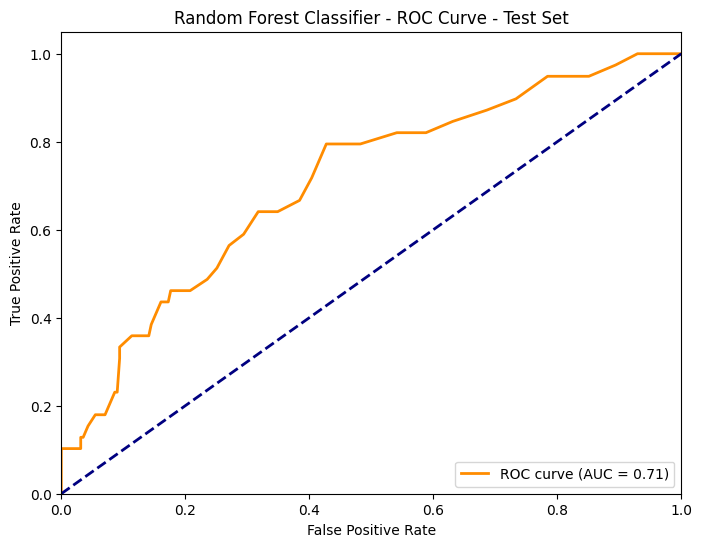

In [14]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_rf_pred = rf_model.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_rf_pred)
confusion_rf = confusion_matrix(y_test, y_rf_pred)
classification_rep_rf = classification_report(y_test, y_rf_pred)

# Print the results
print("Random Forest Classifier Results:")
print("Accuracy:", accuracy_rf)
print("Confusion Matrix:\n", confusion_rf)
print("Classification Report:\n", classification_rep_rf)

import seaborn as sns
from sklearn.metrics import roc_curve, auc

# Convert 'Yes' and 'No' to 1 and 0 in y_test
y_test_binary = y_test.map({'Yes': 1, 'No': 0})

# Visualize the ROC curve for the Random Forest model
fpr_rf, tpr_rf, _ = roc_curve(y_test_binary, rf_model.predict_proba(X_test)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier - ROC Curve - Test Set')
plt.legend(loc='lower right')
plt.show()


Random